<a href="https://colab.research.google.com/github/SyamilTamlikha/Test/blob/main/2018395_Midterm_MV_SEM1_2324.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessment / Midterm: Machine Vision and Deep Learning
<span style="color:blue">
    
1) Answer all questions
    
2) This assessment is open-book. You are allowed to refer to any references including online materials, books, notes, codes, github links, etc

3) Copy this notebook to your google drive (click **FILE** > **save a copy in Drive**)

4) Upload the **answer notebook & trained model** (for Question 3) to your github.

5) Submit the assessment by sharing the link to your github containing the answers.
    
</span>

**QUESTION 1 [15 marks]**

a) Let *k*, *s* and *p* be 4, 2 and 1, respectively. What will be the shape of the output of the convolutional layer? (2 marks)

>>import torch \
import torch.nn as nn \
input_img = torch.rand(1,3,10,10) \
layer = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=*k*, stride=*s*, padding=*p*)

<span style="color:blue">
    answer: The shape of the output is 1 x 12 x 5 x 5
</span>

b) Batch Normalization (BN) normalizes the mean and standard deviation for each: (tick X for the correct answer(s)) (2 marks)

 - [X] Individual feature map
 - [X] Instance in the mini-batch
 - [ ] Spatial dimension    

c) Which one of the following is not an advantage of Batch Normalization (BN)? (tick X for the correct answer(s)) (2 marks)

- [ ] BN accelerates the training of deep neural networks and tackles the vanishing gradient problem.
- [ ] For every input mini-batch, we calculate different statistics. This introduces some sort of regularization.
- [X] BN reduces the dependence of gradients on the scale of the parameters or of their initial values.
- [X] BN needs a much slower learning rate for the total architecture to converge.

d) Choose the correct statement. (tick X for the correct answer) (2 marks)

- [X] A larger kernel is preferred for information that resides globally, and a smaller kernel is preferred for information that is distributed locally.
- [ ] A larger kernel is preferred for information that resides locally, and a smaller kernel is preferred for information that is distributed globally.

e) In the following network, how many learnable parameters (weights) are there? (2 marks)

In [ ]:
model = nn.Sequential(
        nn.Linear(3,20),
        nn.ReLU(),
        nn.Linear(20,2)
    )

<span style="color:blue">
    answer: There are 122 learnable parameters.
</span>

f) Which of the following statements are true about deep neural networks? (tick X for the correct answer) (2 marks)

- [X] Deep neural networks usually require a big amount of data to be properly trained.
- [X] They can be fooled by adversarial/ noisy examples.
- [X] They are difficult to interpret and understand.
- [X] They can still be subject to biases.
- [ ] They fail to understand the context of the data that they are handling.
- [X] They perform very well on individual tasks but fail to generalize to many different tasks.

g) Run the code in the next cell.

In [ ]:
# import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline

# generate synthetic data in 2D
X, Y = make_moons(500, noise=0.2)

# plot the data
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('2D Data')
plt.show()

Can this data be correctly separable using the classifier below? Why? (3 marks)

model = nn.Sequential( \
    nn.Linear(n_input_dim, n_output), \
    nn.Sigmoid() \
    )
    
<span style="color:blue">
    answer: The classifier provided can only learn a linear decision boundary which is a straight line, but the data is non linear and it cannot be seperated by a straight line
</span>

**QUESTION 2 [40 marks]**

The COVID-19 pandemic continues to have a devastating effect on the health and well-being of the global population. A critical step in the fight against COVID-19 is effective screening of infected patients, with one of the key screening approaches being radiology examination using chest radiography. As a deep learning engineer, you are tasked to classify a dataset of X-ray images as either "normal", "covid" or "viral pneumonia". Use the chest X-ray dataset publicly available at https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset to answer the following questions.


a) Create and train a ConvNet corresponding to the following architecture in Fig. 1 (with modifications of the input and final layers). Please include **(10 marks)**:

    1) The dataloader to load the train and test datasets.

    2) The model definition (either using sequential method OR pytorch class method).

    3) Define your training loop.

    4) Output the mean accuracy for the whole testing dataset.

![pic](https://raw.githubusercontent.com/CUTe-EmbeddedAI/images/main/images/LeNet.png)
    
                                Fig. 1: A convolutional neural network

In [ ]:
!pip install -q kaggle


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'pranavraikokte/covid19-image-dataset'

 88% 139M/158M [00:00<00:00, 213MB/s]
100% 158M/158M [00:00<00:00, 212MB/s]


In [ ]:
import zipfile
dataset_zip = zipfile.ZipFile('covid19-image-dataset.zip', 'r')
dataset_zip.extractall()
dataset_zip.close()

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, models
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose(
    [transforms.Resize((224,224)),
     transforms.ToTensor(),
     transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])]
)

train_dir = '/content/Covid19-dataset/train' # define path of train dataset from kaggle
test_dir = '/content/Covid19-dataset/test'  # define path of test dataset from kaggle

train_data = datasets.ImageFolder(root=train_dir,
                                  transform = transform)
test_data = datasets.ImageFolder(root=test_dir,
                                  transform = transform)

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data,batch_size=4, shuffle=True)

test_dataloader = DataLoader(test_data,batch_size=4, shuffle=False)

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
class AssignmentModel(nn.Module):
    def __init__(self):
        super(AssignmentModel, self).__init__()

        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)

        # Fully connected layers
        # Assuming 56x56 spatial dimensions after pooling
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 3)  # Adjusted for 3 classes

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten before fully connected layers
        x = x.view(-1, 32 * 56 * 56)

        # Fully connected layers with ReLU activation
        x = self.relu(self.fc1(x))
        x = self.fc2(x)

        return x

torch.manual_seed(42)
myModel = AssignmentModel().to(device)
myModel

AssignmentModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=myModel.parameters(),
                            lr=0.001, momentum = 0.09)

In [ ]:
import time
from tqdm.auto import tqdm

def train_and_validate(model, loss_criterion, optimizer, train_dataloader, test_dataloader, epochs=25, device='cuda'):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param train_dataloader: DataLoader for training data
        :param test_dataloader: DataLoader for test/validation data
        :param epochs: Number of epochs (default=25)
        :param device: Device to perform computations ('cuda' or 'cpu')

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in tqdm(range(epochs)):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))

        model.train()

        train_loss = 0.0
        train_acc = 0.0

        valid_loss = 0.0
        valid_acc = 0.0

        for i, (inputs, labels) in enumerate(train_dataloader):

            inputs = inputs.to(device)
            labels = labels.to(device)

            # Clean existing gradients
            optimizer.zero_grad()

            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)

            # Compute loss
            loss = loss_criterion(outputs, labels)

            # Backpropagate the gradients
            loss.backward()

            # Update the parameters
            optimizer.step()

            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)

            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))

            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))

            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)

        # Validation - No gradient tracking needed
        with torch.no_grad():

            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(test_dataloader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)


        # Find average training loss and training accuracy
        avg_train_loss = train_loss / len(train_dataloader.dataset)
        avg_train_acc = train_acc / len(train_dataloader.dataset)

        # Find average validation loss and training accuracy
        avg_test_loss = valid_loss / len(test_dataloader.dataset)
        avg_test_acc = valid_acc / len(test_dataloader.dataset)

        history.append([avg_train_loss, avg_test_loss, avg_train_acc, avg_test_acc])

        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc * 100, avg_test_loss, avg_test_acc * 100, epoch_end - epoch_start))

        # Save if the model has best accuracy till now
        if avg_test_acc > best_acc:
            best_acc = avg_test_acc
            best_model = model
            torch.save(best_model, 'best_model.pt')

    return best_model, history



In [ ]:
# Train the model for 10 epochs

num_epochs = 10
myModel, history = train_and_validate(myModel, loss_fn, optimizer, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7201, Accuracy: 75.6972%, 
		Validation : Loss : 0.6271, Accuracy: 77.2727%, Time: 12.4642s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.4712, Accuracy: 80.4781%, 
		Validation : Loss : 0.5912, Accuracy: 68.1818%, Time: 11.2591s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.3690, Accuracy: 87.6494%, 
		Validation : Loss : 0.4930, Accuracy: 81.8182%, Time: 10.3909s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.2977, Accuracy: 92.0319%, 
		Validation : Loss : 0.4466, Accuracy: 81.8182%, Time: 10.9573s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.2525, Accuracy: 92.0319%, 
		Validation : Loss : 0.5496, Accuracy: 71.2121%, Time: 12.2508s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.2225, Accuracy: 92.8287%, 
		Validation : Loss : 0.5710, Accuracy: 78.7879%, Time: 11.2907s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1975, Accuracy: 91.6335%, 
		Validation : Loss : 0.3882, Accuracy: 86.3636%, Time: 11.2895s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1708, Accura

In [ ]:
def eval_model(model, test_dataloader):

  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for images, labels in test_dataloader:
          images, labels = images.to(device), labels.to(device)
          # calculate outputs by running images through the network
          outputs = model(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  accuracy = 100 * correct // total

  print(f'Accuracy of the network on the 10000 test images: {accuracy:.2f} %')

  return accuracy

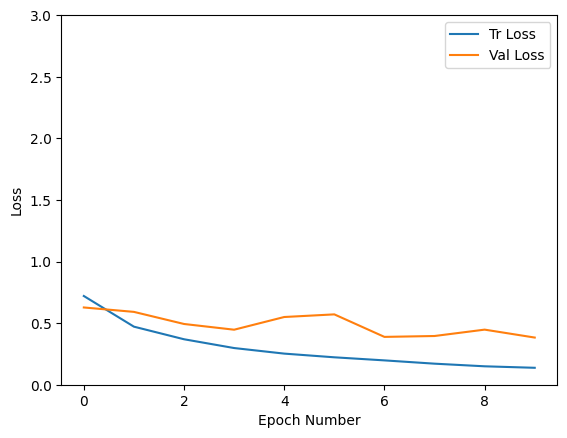

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  # plt.savefig('cifar10_loss_curve.png')
  plt.show()

plot_loss(history)

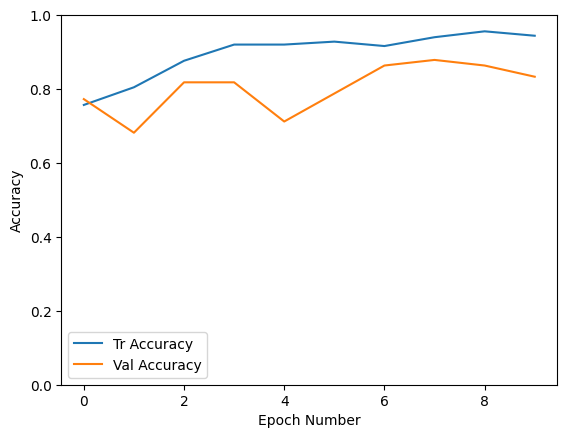

Accuracy of the network on the 10000 test images: 83.00 %


In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  # plt.savefig('cifar10_accuracy_curve.png')
  plt.show()

plot_accuracy(history)
accuracy_myModel = eval_model(myModel, test_dataloader)

b) Based on Question 2 a), answer the following questions:
    
    i) Is the model overfitting? Why? (4 marks)
   <font color='blue'>YES. Because based on the loss curve the training loss continues to decrease but the validation loss starts to increase. Therefore a large gap between this two indicates overfitting</font>
    
    ii) Propose two methods to reduce the effect of overfitting. (4 marks)
   <font color='blue'>Two methods that I propose are: (1) Regularization (2) Dropout</font>
   
    iii) Implement the two proposed methods in Q2 b) ii) in the next cell and show that the overfitting has been reduced. (8 marks)

In [ ]:
import torch.nn as nn

class AssignmentModel(nn.Module):
    def __init__(self):
        super(AssignmentModel, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)

        self.fc1 = nn.Linear(32 * 56 * 56, 128)
        self.fc2 = nn.Linear(128, 3)  # Adjusted for 3 classes

        # Dropout layers
        self.dropout1 = nn.Dropout(p=0.25)  # 25% dropout rate
        self.dropout2 = nn.Dropout(p=0.5)  # 50% dropout rate

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolutional layers
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))

        # Flatten before fully connected layers
        x = x.view(-1, 32 * 56 * 56)

        # Fully connected layers with dropout and ReLU activation
        x = self.dropout1(self.relu(self.fc1(x)))
        x = self.dropout2(self.fc2(x))  # Apply dropout before the output layer

        return x

torch.manual_seed(42)
myModel2 = AssignmentModel().to(device)
myModel2

AssignmentModel(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=100352, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=3, bias=True)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (relu): ReLU()
)

In [ ]:
optimizer2 = torch.optim.SGD(params=myModel2.parameters(),
                            lr=0.001, momentum=0.09, weight_decay= 0.001) # L2 regularization

In [ ]:
# Train the model for 10 epochs

num_epochs = 10
myModel2, history2 = train_and_validate(myModel2, loss_fn, optimizer2, train_dataloader, test_dataloader, num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.4749, Accuracy: 79.6813%, 
		Validation : Loss : 0.4274, Accuracy: 80.3030%, Time: 11.3445s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.5585, Accuracy: 77.2908%, 
		Validation : Loss : 0.4543, Accuracy: 86.3636%, Time: 11.4144s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.4986, Accuracy: 80.4781%, 
		Validation : Loss : 0.4493, Accuracy: 77.2727%, Time: 11.3935s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.4637, Accuracy: 79.2829%, 
		Validation : Loss : 0.4023, Accuracy: 86.3636%, Time: 11.2644s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.4756, Accuracy: 77.6892%, 
		Validation : Loss : 0.3853, Accuracy: 84.8485%, Time: 11.3498s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.4534, Accuracy: 78.0876%, 
		Validation : Loss : 0.3989, Accuracy: 86.3636%, Time: 11.7247s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.4645, Accuracy: 78.0876%, 
		Validation : Loss : 0.3949, Accuracy: 86.3636%, Time: 10.8983s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.4510, Accura

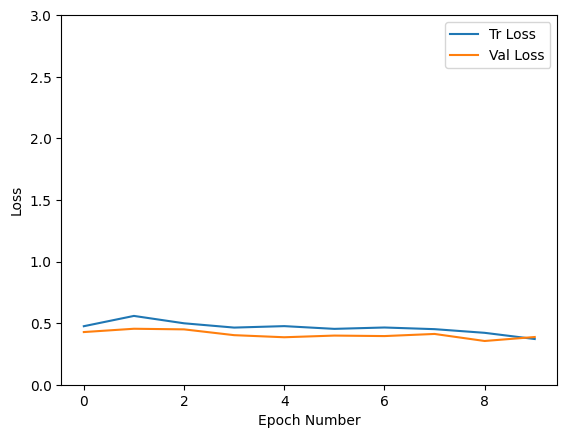

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  plt.show()

plot_loss(history2)

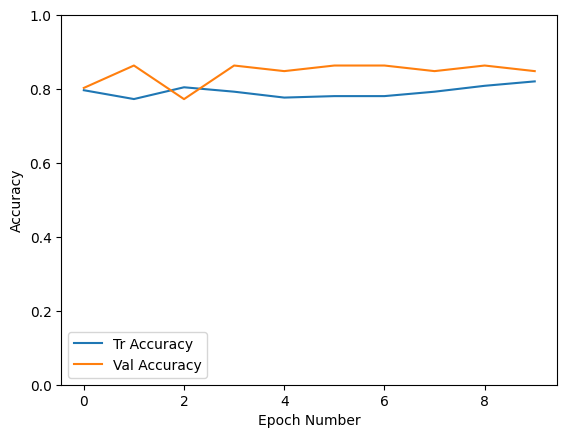

Accuracy of the network on the 10000 test images: 84.00 %


In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  plt.show()

plot_accuracy(history2)
accuracy_myModel = eval_model(myModel2, test_dataloader)

c) Replace your defined ConvNet in b) with a pre-trained model. Then, proceed with a transfer learning and finetune the model for the COVID-19 dataset. **(10 marks)**

In [ ]:
model_pretrained = models.squeezenet1_0(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_0_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 46.6MB/s]


In [ ]:
model_pretrained.classifier[1] = nn.Conv2d(512, 3, kernel_size=(1, 1), stride=(1, 1))

In [ ]:
model_pretrained.to('cuda')

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer3 = torch.optim.SGD(model_pretrained.parameters(),lr=0.001,momentum=0.9)

In [ ]:
num_epochs = 10
trained_model, history = train_and_validate(model_pretrained,loss_fn,optimizer3,
                                            train_dataloader,test_dataloader,
                                            num_epochs)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1/10
Epoch : 000, Training: Loss: 0.7642, Accuracy: 66.1355%, 
		Validation : Loss : 1.1674, Accuracy: 30.3030%, Time: 13.2720s
Epoch: 2/10
Epoch : 001, Training: Loss: 0.6942, Accuracy: 68.5259%, 
		Validation : Loss : 1.2591, Accuracy: 62.1212%, Time: 12.0250s
Epoch: 3/10
Epoch : 002, Training: Loss: 0.5140, Accuracy: 82.0717%, 
		Validation : Loss : 0.5767, Accuracy: 69.6970%, Time: 11.6707s
Epoch: 4/10
Epoch : 003, Training: Loss: 0.3047, Accuracy: 88.0478%, 
		Validation : Loss : 0.2206, Accuracy: 89.3939%, Time: 12.1513s
Epoch: 5/10
Epoch : 004, Training: Loss: 0.3552, Accuracy: 88.4462%, 
		Validation : Loss : 0.2089, Accuracy: 92.4242%, Time: 12.0950s
Epoch: 6/10
Epoch : 005, Training: Loss: 0.1933, Accuracy: 93.6255%, 
		Validation : Loss : 0.2923, Accuracy: 86.3636%, Time: 12.0637s
Epoch: 7/10
Epoch : 006, Training: Loss: 0.1779, Accuracy: 93.2271%, 
		Validation : Loss : 0.1259, Accuracy: 95.4545%, Time: 12.2182s
Epoch: 8/10
Epoch : 007, Training: Loss: 0.1130, Accura

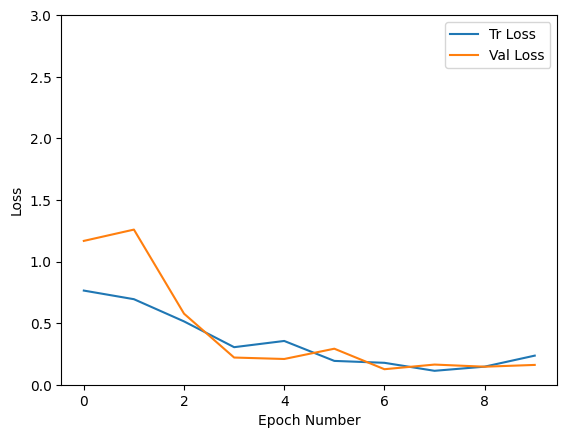

In [ ]:
#Analyze the loss curve

def plot_loss(history):
  history = np.array(history)
  plt.plot(history[:,0:2])
  plt.legend(['Tr Loss', 'Val Loss'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Loss')
  plt.ylim(0,3)
  plt.show()

plot_loss(history)

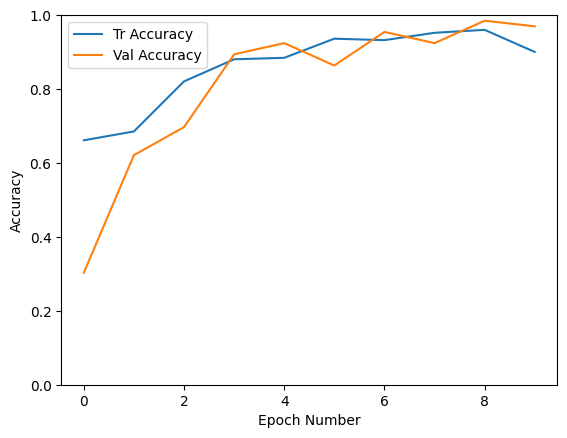

Accuracy of the network on the 10000 test images: 96.00 %


In [ ]:
def plot_accuracy(history):
  history = np.array(history)
  plt.plot(history[:,2:4])
  plt.legend(['Tr Accuracy', 'Val Accuracy'])
  plt.xlabel('Epoch Number')
  plt.ylabel('Accuracy')
  plt.ylim(0,1)
  plt.show()

plot_accuracy(history)
accuracy_myModel = eval_model(model_pretrained, test_dataloader)

d) Do you see any accuracy improvement? Whether it is a "yes" or "no", discuss the possible reasons contributing to the accuracy improvement/ unimprovement. **(4 marks)**

<span style="color:blue">
    Yes, because pretrained model has already seen a diverse range of data during its training and this knowledge can be beneficial for making prediction. Moreover this is also due to transfer learning. It leverages the knowledge gained from these tasks and applis it to a specific task of interest. The regularization also be the reason of the improvement. The pre-trained weights provide a good initialization point, and during fine-tuning, the model adapts to the specifics of your dataset. This can help prevent overfitting  </span>

**QUESTION 3** **[15 marks]**

In a machine vision project, you decide to design a door access control system based on hand gestures. Only those who shows the correct hand gesture will be granted the access. There are three gestures that are recognized as correct access passcode which are "shaka", "peace" and "thumbs up", as depicted in Fig. 2.

![pic](https://simplyorganizedhi.com/media/catalog/product/1/6/169500.jpg)

                                Fig. 2 Shaka,peace, and thumbs up


Using the end-to-end object detection pipeline that you have learned, develop your own hand gesture detector so that it can be incorporate to a door access control system.

Deliverable for this question is the model .pt file. Change the name to <your_name>.pt file (e.g. hasan.pt).

- Marks are given based on the performance of the model when tested using my machine and camera at my office. This question aims to evaluate the model's robustness and generalization capabilities.